<a href="https://colab.research.google.com/github/deloragaskins/data_science_public/blob/create_tutorials/DK_tutorials/VisualizingSMARTsSubstructureswithClinToxmolecules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction




**Learning Goals**
1.   Visualize sets of molecules in a compact way using rdkit or matplotlib
2.   Highlight substructures of interest including:

(i)  multiple occurences of substructures in same molecule

(ii) partial highlights of desired substructures 


#preamble

In [1]:
!pip install --pre deepchem
!pip install rdkit-pypi

#to access ClinTox_
# import MolNet dataloder from bert-loves-chemistry fork
!git clone https://github.com/seyonechithrananda/bert-loves-chemistry.git
%cd /content/bert-loves-chemistry
!pwd
from chemberta.utils.molnet_dataloader import load_molnet_dataset, write_molnet_dataset_for_chemprop

#to play with and display chemical structures
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import Draw as ChemDraw
from rdkit.Chem.Draw import MolToImage

import matplotlib.pyplot as plt
from matplotlib import colors


fatal: destination path 'bert-loves-chemistry' already exists and is not an empty directory.
/content/bert-loves-chemistry
/content/bert-loves-chemistry


#Exploratory data analysis of ClinTox

We load the ClinTox dataset into a dataframe with SMILES representations and toxicity for each molecule.  

In [2]:
tasks, (train_df, valid_df, test_df), transformers = load_molnet_dataset("clintox", tasks_wanted=None)
full_ClinTox_df = train_df.append(valid_df, ignore_index=True)
full_ClinTox_df=full_ClinTox_df.append(test_df, ignore_index=True)
length_peek=5
full_ClinTox_df['text'].head(length_peek)

'split' is deprecated.  Use 'splitter' instead.


Using tasks ['CT_TOX'] from available tasks for clintox: ['FDA_APPROVED', 'CT_TOX']


0        CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O
1    O=C(NCC(O)CO)c1c(I)c(C(=O)NCC(O)CO)c(I)c(N(CCO...
2                             Clc1cc(Cl)c(OCC#CI)cc1Cl
3    N#Cc1cc(NC(=O)C(=O)[O-])c(Cl)c(NC(=O)C(=O)[O-])c1
4               NS(=O)(=O)c1cc(Cl)c(Cl)c(S(N)(=O)=O)c1
Name: text, dtype: object

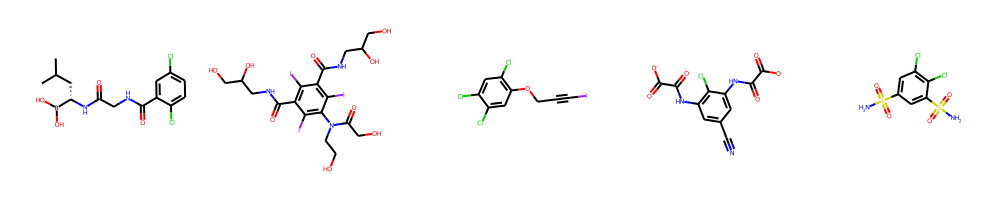

In [3]:
ms = [Chem.MolFromSmiles(x) for x in full_ClinTox_df['text'][:length_peek]]
ChemDraw.MolsToGridImage(ms,molsPerRow=5)

visualise substructures: aromatic ring

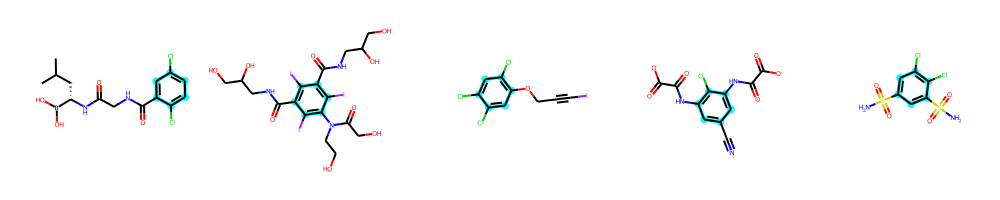

In [4]:
substructure_smarts='c1ccccc1'
#substructure_smarts=molecule_smiles[:10]
core=Chem.MolFromSmarts(substructure_smarts)
hcolor = colors.to_rgb('cyan')
hAList=[mol.GetSubstructMatch(core) for mol in ms]

hBList=[]
for counter1 in range(len(ms)):
  hit_bonds=[]
  for bond in core.GetBonds():
      aid1 = hAList[counter1][bond.GetBeginAtomIdx()]
      aid2 = hAList[counter1][bond.GetEndAtomIdx()]
      hit_bonds.append(ms[counter1].GetBondBetweenAtoms(aid1,aid2).GetIdx())
  hBList.append(tuple(hit_bonds))

    

hAC=[]
hBC=[]
for counter0 in range(len(ms)):
  atom_cols = {}
  for  at in hAList[counter0]:
     atom_cols[at] = hcolor
  hAC.append(atom_cols)
  bond_cols = {}
  for bd in hBList[counter0]:
    bond_cols[bd] = hcolor
  hBC.append(bond_cols)
  
ChemDraw.MolsToGridImage(ms,molsPerRow=5,highlightAtomLists=hAList,highlightAtomColors=hAC,highlightBondLists=hBList,highlightBondColors=hBC)


visualise substructures: set of substituents

This substructure occurs in multiple places in the molecule. All are shown
This substructure does not appear in the molecule.
This substructure occurs in multiple places in the molecule. All are shown
This substructure does not appear in the molecule.
This substructure occurs in multiple places in the molecule. All are shown


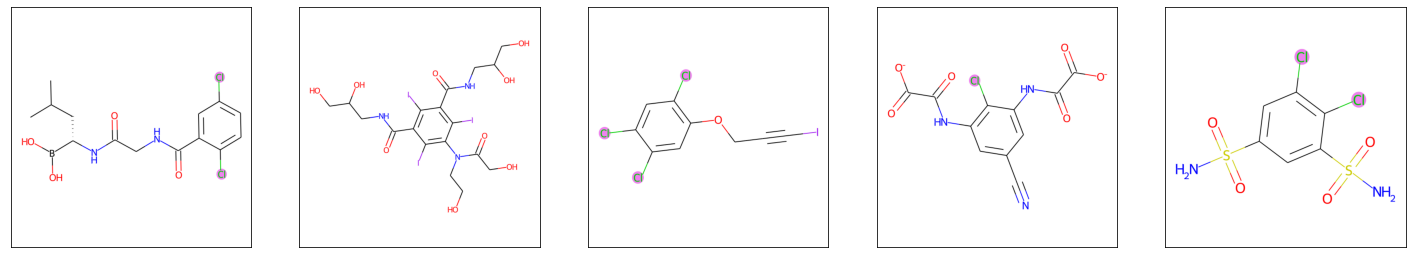

In [10]:
def extract_all_substructures(substructures):
  if len(substructures)>1:
    print('This substructure occurs in multiple places in the molecule. All are shown')
  else:
    print('This substructure does not appear in the molecule.')
  Atoms_list=[]  
  for substructure in substructures:
      for atom_counter in range(len(substructure)):
        Atoms_list.append(substructure[atom_counter])
  return Atoms_list

def highlighed_img_from_smilessmarts_all(molecule_smiles,substructure_smarts):
  m=Chem.MolFromSmiles(molecule_smiles)
  substructures=m.GetSubstructMatches(Chem.MolFromSmarts(substructure_smarts))
  Atoms_list=extract_all_substructures(substructures)
  hcolor = colors.to_rgb('violet')
  img = MolToImage(m, size=(600, 600),fitImage=True,highlightAtoms=Atoms_list,highlightColor=hcolor)
  return img

################################################################################

substructure_smarts='Cl'

counter0=0 
size_adj_x=1
size_adj_y=5
plt.figure(figsize=(length_peek*size_adj_y,length_peek*size_adj_x))

number_of_rows=1
number_of_columns=length_peek
for counter0 in range(length_peek):
  plt.subplot(number_of_rows,number_of_columns,counter0+1)
  molecule_smiles=full_ClinTox_df['text'][counter0]
  plt.imshow(highlighed_img_from_smilessmarts_all(molecule_smiles,substructure_smarts))
  plt.xticks([])
  plt.yticks([])



NS(=O)(=O)c1cc(Cl)c(Cl)c(S(N)(=O)=O)c1
NS(=O)(=O)
S(N)(=O)=O
This substructure occurs in multiple places in the molecule. All are shown
This substructure occurs in multiple places in the molecule.Only the 1 of 2 one is being shown.
This substructure occurs in multiple places in the molecule.Only the 2 of 2 one is being shown.
This substructure occurs in multiple places in the molecule. All are shown


([], <a list of 0 Text major ticklabel objects>)

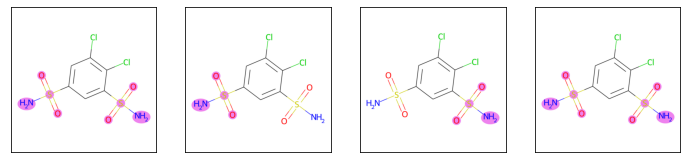

In [14]:
def extract_nth_substructure(substructures,n):
  if len(substructures)>1:
    print(f'This substructure occurs in multiple places in the molecule.Only the {n+1} of {len(substructures)} one is being shown.')
  Atoms_list=[]  
  substructure=substructures[n]
  for atom_counter in range(len(substructure)):
    Atoms_list.append(substructure[atom_counter])
  return Atoms_list

def highlighed_img_from_smilessmarts_nth(molecule_smiles,substructure_smarts,n):
  m=Chem.MolFromSmiles(molecule_smiles)
  substructures=m.GetSubstructMatches(Chem.MolFromSmarts(substructure_smarts))
  Atoms_list=extract_nth_substructure(substructures,n)
  hcolor = colors.to_rgb('violet')
  img = MolToImage(m, size=(600, 600),fitImage=True,highlightAtoms=Atoms_list,highlightColor=hcolor)
  return img

def smiles_to_smarts(structure_smiles):
  m = Chem.MolFromSmiles(structure_smiles)
  m_dict={}
  for atom in m.GetAtoms():
      m_dict['#'+str(atom.GetAtomicNum())] = atom.GetSymbol()
  structure_smarts= Chem.rdmolfiles.MolToSmarts(m)
  #structure_smarts.replace('#8', 'O').replace('#16', 'S').replace('#7', 'N')
  for at_num, at_sym in m_dict.items():
    structure_smarts= structure_smarts.replace(at_num, at_sym)
  return structure_smarts
################################################################################

mol_index=4
molecule_smiles=full_ClinTox_df['text'][ mol_index]
print(molecule_smiles)
substructure_smiles_1=molecule_smiles[:10]
print(substructure_smiles_1)
substructure_smiles_2=molecule_smiles[-13:-3]
print(substructure_smiles_2)

substructure_smart_1=substructure_smiles_1
substructure_smart_2=smiles_to_smarts(substructure_smiles_2)

number_of_disp=4
size_adj_x=1
size_adj_y=3
plt.figure(figsize=(number_of_disp*size_adj_y,number_of_disp*size_adj_x))
######################################################################################
chosen_substructure=substructure_smart_1
plt.subplot(1,number_of_disp,1)
plt.imshow(highlighed_img_from_smilessmarts_all(molecule_smiles,chosen_substructure))
plt.xticks([])
plt.yticks([])

plt.subplot(1,number_of_disp,2)
plt.imshow(highlighed_img_from_smilessmarts_nth(molecule_smiles,chosen_substructure,0))
plt.xticks([])
plt.yticks([])

plt.subplot(1,number_of_disp,3)
plt.imshow(highlighed_img_from_smilessmarts_nth(molecule_smiles,chosen_substructure,1))
plt.xticks([])
plt.yticks([])
#######################################################################################
chosen_substructure=substructure_smart_2
plt.subplot(1,number_of_disp,4)
plt.imshow(highlighed_img_from_smilessmarts_all(molecule_smiles,chosen_substructure))
plt.xticks([])
plt.yticks([])

